# Exploratory Data Analysis

In this analysis, we will focus on three key datasets: `Member`, `Master` (Ticket), and `Detail` (Ticket Detail). \
The process will be divided into two main stages for each dataset:
1. `Data preprocessing`
2. `Data Visualization`

#### Loading required libraries

In [1]:
%matplotlib inline
import sys
sys.path.append('..')

In [2]:
from utils.const import (
    SAMPLE_DATA_MASTER_PATH,
    SAMPLE_DATA_DETAIL_PATH,
    SAMPLE_DATA_MEMBER_PATH,
    GEOLOCATION_PATH
)
from typing import Tuple, List, Dict
from pywaffle import Waffle
from plotly.subplots import make_subplots
from itertools import product
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# use png as default renderer, since it's the only renderer that works on github
# You can use 'notebook' to render the plot in jupyter notebook
pio.renderers.default = 'png'


pd.options.mode.chained_assignment = 'warn'
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Loading dataset

In [3]:
member_df = pd.read_csv(SAMPLE_DATA_MEMBER_PATH)
master_df = pd.read_csv(SAMPLE_DATA_MASTER_PATH)
detail_df = pd.read_csv(SAMPLE_DATA_DETAIL_PATH)

### 1. Member Data

In [4]:
member_df.head()

,MemberID,Gender,Birthday,SignupDate,SignupChannle,CountyName,CityName,LivingStatus,ChildCounts
0,af3e81d78f9bb7d9c74c1f74e1bdc271446e1b7010cb60...,Female,2004-02-24,2022-05-01,Offline,新北市,中和區,with child,0
1,23481ba46bf4ad9155a745cbc148a95b3eefe1dd719e03...,Female,1969-04-30,2023-04-10,Offline,高雄市,鳳山區,not single,0
2,945442127694a967692932a7650ac611c59d8ec98a138f...,Male,1986-11-21,2015-09-14,Offline,台中市,南屯區,with child,3
3,77ab5b8eeafbb4f707aced232fda79906247045d201631...,Female,1989-11-05,2023-08-13,Online,新北市,三峽區,not single,0
4,7934c2af393a76c72777d9fb5681c99062900825badb60...,Female,2001-02-18,2019-10-14,Online,台中市,南屯區,with child,0


In [5]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MemberID       20000 non-null  object
 1   Gender         19651 non-null  object
 2   Birthday       20000 non-null  object
 3   SignupDate     20000 non-null  object
 4   SignupChannle  19980 non-null  object
 5   CountyName     19951 non-null  object
 6   CityName       19926 non-null  object
 7   LivingStatus   15093 non-null  object
 8   ChildCounts    20000 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.4+ MB


#### 1.1 Member Data Preprocessing

In [6]:

# Drop data which missing gender or signup channel
member_df = member_df[
    member_df['Gender'].notna() & member_df['SignupChannle'].notna()
]
member_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19634 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MemberID       19634 non-null  object
 1   Gender         19634 non-null  object
 2   Birthday       19634 non-null  object
 3   SignupDate     19634 non-null  object
 4   SignupChannle  19634 non-null  object
 5   CountyName     19599 non-null  object
 6   CityName       19577 non-null  object
 7   LivingStatus   14953 non-null  object
 8   ChildCounts    19634 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


In [7]:
# Add 'Age', 'SignupDuration' column to member_df
now = pd.Timestamp('now')
member_df['Birthday'] = pd.to_datetime(member_df['Birthday'], format='%Y-%m-%d')
member_df.loc[:, 'Age'] = (now - member_df['Birthday']).apply(lambda x: x.days) // 365
member_df['SignupDate'] = pd.to_datetime(member_df['SignupDate'], format='%Y-%m-%d')
member_df.loc[:, 'SignupDuration'] = (now - member_df['SignupDate']).dt.days
member_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19634 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MemberID        19634 non-null  object        
 1   Gender          19634 non-null  object        
 2   Birthday        19634 non-null  datetime64[ns]
 3   SignupDate      19634 non-null  datetime64[ns]
 4   SignupChannle   19634 non-null  object        
 5   CountyName      19599 non-null  object        
 6   CityName        19577 non-null  object        
 7   LivingStatus    14953 non-null  object        
 8   ChildCounts     19634 non-null  int64         
 9   Age             19634 non-null  int64         
 10  SignupDuration  19634 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(6)
memory usage: 1.8+ MB


#### 1.2 Member Data Visualization

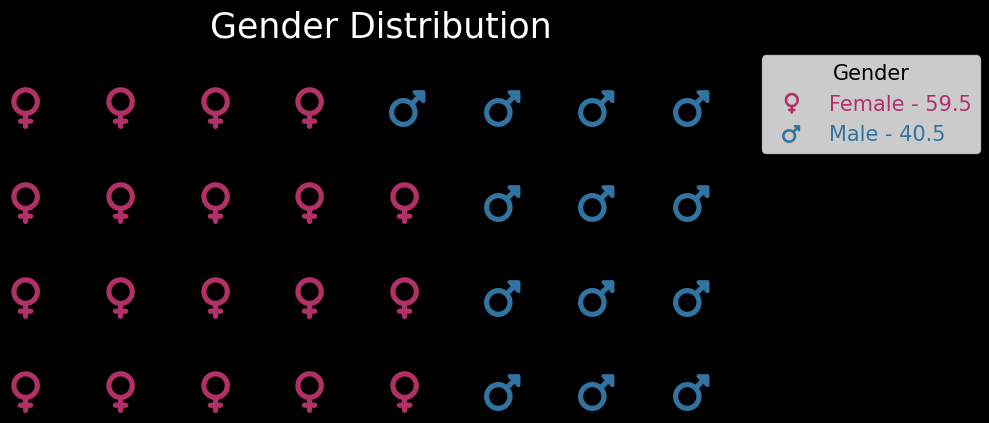

In [8]:
# Gender distribution
gender = member_df['Gender'].value_counts(normalize=True).mul(100).round(1)
fig = plt.figure(
    FigureClass = Waffle, 
    rows = 4,
    columns = 8,
    values = gender,
    colors = ('#B13167', '#3274A1'),
    labels = ['{} - {}'.format(a, b) for a, b in zip(gender.index, gender)],
    legend = {
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1), 
        'fontsize': 15, 
        'labelcolor': 'linecolor',
        'title': 'Gender',
        'title_fontsize': 15,
        'facecolor': 'white'
        },
    font_size = 75, 
    icons = ['venus', 'mars'],
    icon_legend = True,
    icon_size=30,
    figsize = (10, 6),
    facecolor = 'black'
)

plt.title('Gender Distribution', fontsize = 25, color = 'white')
plt.show()


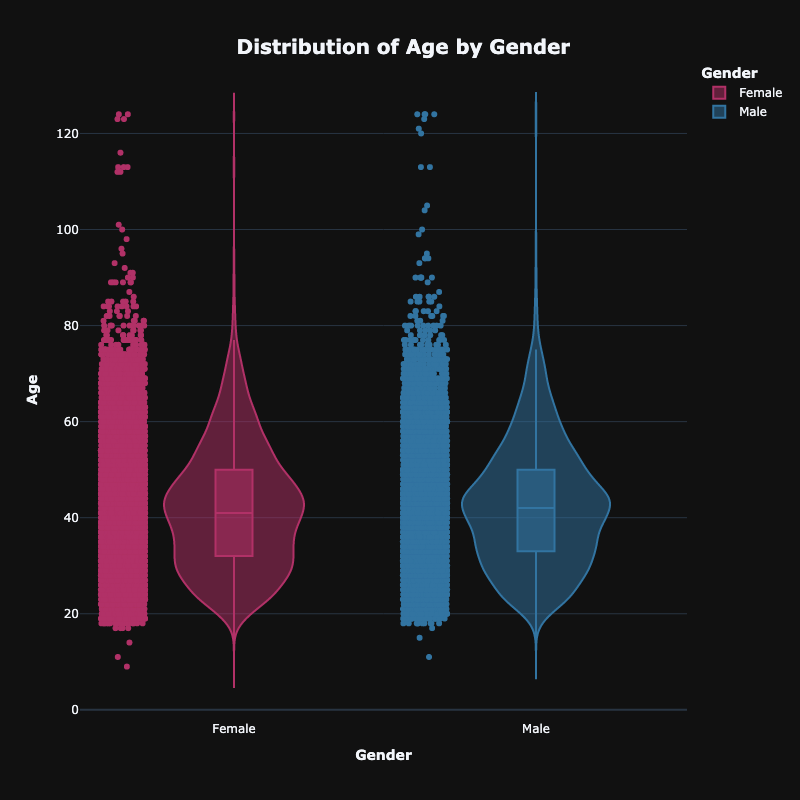

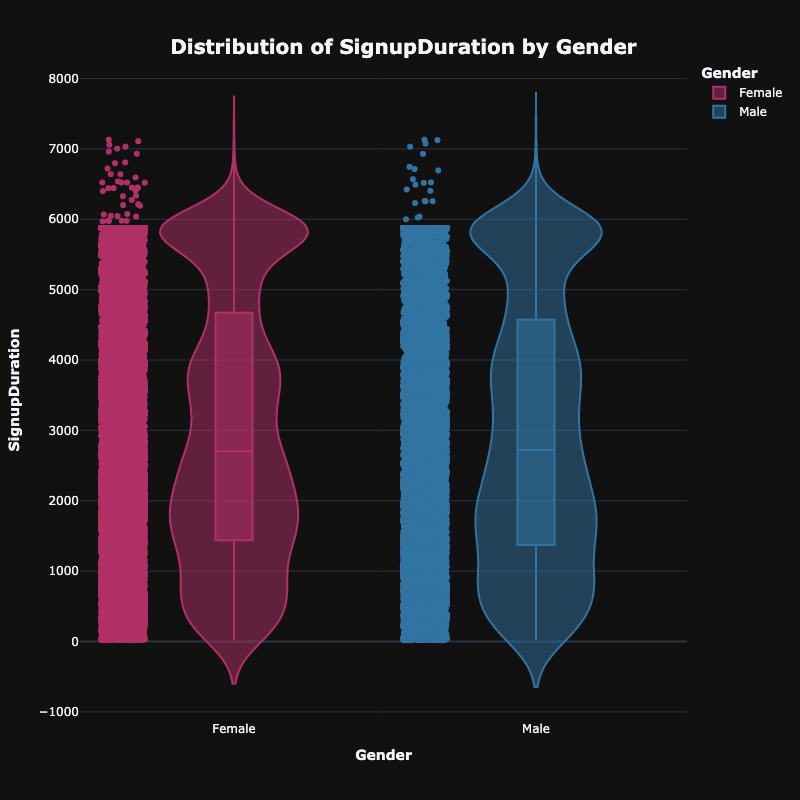

In [9]:
def generate_plotly_distributions_by_gender(df: pd.DataFrame, feature_name: str) -> None:
    color_discrete_map = {'Male': '#3274A1', 'Female':'#B13167'}
    fig = px.violin(
                    df, 
                    x = 'Gender', 
                    y = feature_name, 
                    color = 'Gender', 
                    box = True, 
                    points = 'all',
                    template = 'plotly_dark',
                    color_discrete_map=color_discrete_map
    )

    fig.update_layout(
         autosize = False,
         width = 800,
         height = 800,
         title = dict(
             text = '<b> Distribution of ' + feature_name + ' by Gender</b>',
             x = 0.5,
             y = 0.95,
             font = dict(
                 size = 20
             )
         ),
         legend_title = '<b>Gender</b>',
         xaxis_title = '<b>Gender</b>',
         yaxis_title = '<b> ' + feature_name + ' </b>'
    )

    fig.show()
    
generate_plotly_distributions_by_gender(member_df, 'Age')
generate_plotly_distributions_by_gender(member_df, 'SignupDuration')

In [10]:
# 怎麼年紀這麼大，我是不是算錯
member_df[member_df['Age']> 100].head(15)

,MemberID,Gender,Birthday,SignupDate,SignupChannle,CountyName,CityName,LivingStatus,ChildCounts,Age,SignupDuration
175,298c0fae76c4e18ef59786c31d5c01a60e40ff7e814710...,Male,1903-02-07,2012-07-03,Offline,新北市,汐止區,NaN,0,121,4385
227,f7fd07b02a9b2202309e9a712915305a482f981488d6ae...,Female,1900-04-29,2015-05-12,Offline,南投縣,信義鄉,single,0,124,3342
439,84f3e7c063906eb7d7e0b84e20b4e531b253cc053e45db...,Female,1901-06-07,2011-09-19,Offline,桃園市,八德區,NaN,0,123,4673
1301,8f2e01fe9c2ae34659993595dce78553df09804ba7c3b5...,Female,1922-09-27,2017-05-26,Offline,新北市,新莊區,not single,0,101,2597
1470,97ace21308349fcc42aaa7723e77aaae1df57851d0a737...,Male,1903-10-22,2012-12-20,Offline,桃園市,龜山區,NaN,0,120,4215
2526,54909338488fecccba5cdffd3374f11531848c2a4d1b40...,Male,1911-07-16,2008-06-02,Offline,台北市,中山區,NaN,0,113,5877
3073,e78d8d9e1cd336f2eac5ead13090d9c0f56a9d4a7c3fdd...,Female,1911-03-24,2008-06-02,Offline,高雄市,鳳山區,NaN,0,113,5877
4178,e76070c52c506c93ae3083def8375370960b4241e801af...,Female,1911-12-15,2008-06-02,Offline,新竹縣,竹北市,NaN,0,112,5877
5309,294e5c1d7d6a6aa530180714bfd20711f47c8fcc4e4052...,Male,1920-02-12,2011-10-24,Offline,台北市,大安區,NaN,0,104,4638
6233,a747dd570afd12fc2e4346b0ee4bb81be359f39c68d5d8...,Male,1900-01-01,2009-08-16,Offline,台南市,東區,NaN,0,124,5437


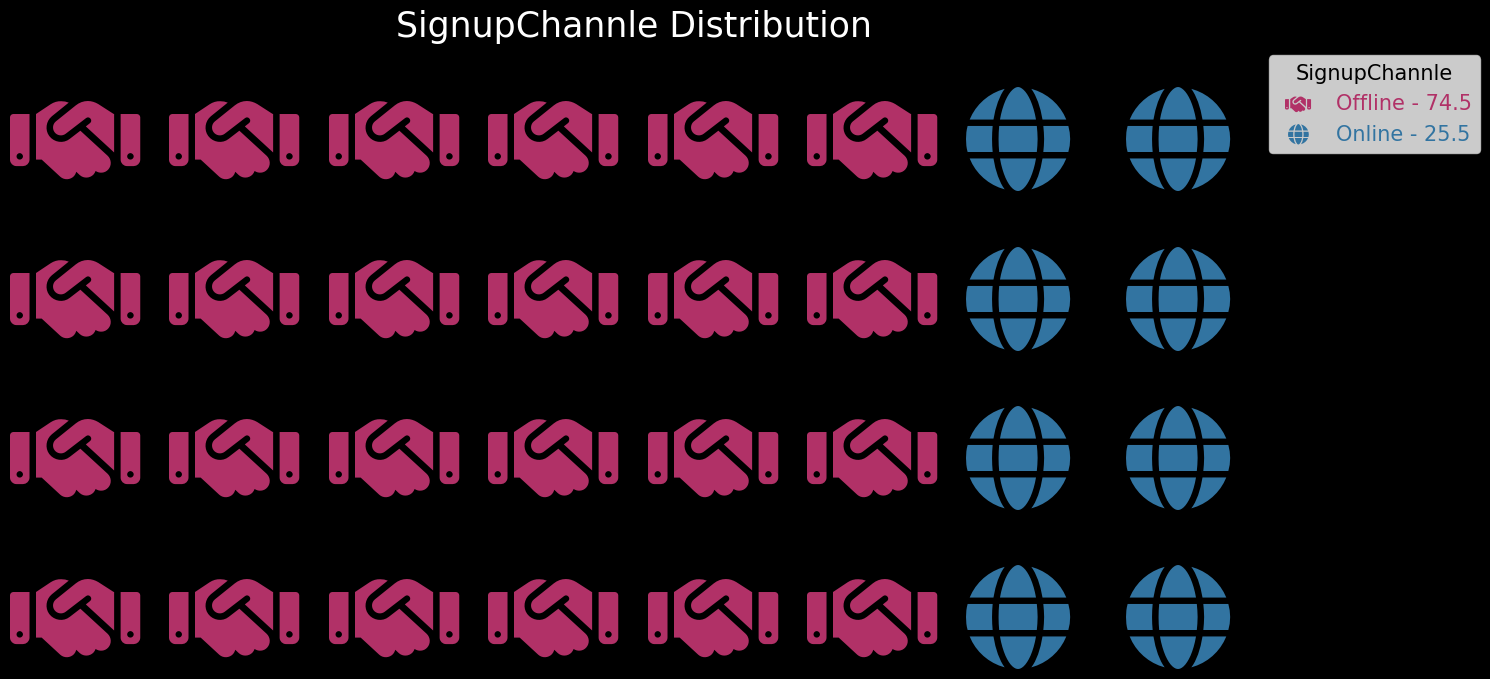

In [11]:
# Signup distribution
signup_df = member_df['SignupChannle'].value_counts(normalize=True).mul(100).round(1)
fig = plt.figure(
    FigureClass = Waffle, 
    rows = 4,
    columns = 8,
    values = signup_df,
    colors = ('#B13167', '#3274A1'),
    labels = ['{} - {}'.format(a, b) for a, b in zip(signup_df.index, signup_df)],
    legend = {
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1), 
        'fontsize': 15, 
        'labelcolor': 'linecolor',
        'title': 'SignupChannle',
        'title_fontsize': 15,
        'facecolor': 'white'
        },
    font_size = 75, 
    icons = ['handshake', 'globe'],
    icon_legend = True,
    figsize = (15, 8),
    facecolor = 'black'
)

plt.title('SignupChannle Distribution', fontsize = 25, color = 'white')
plt.show()

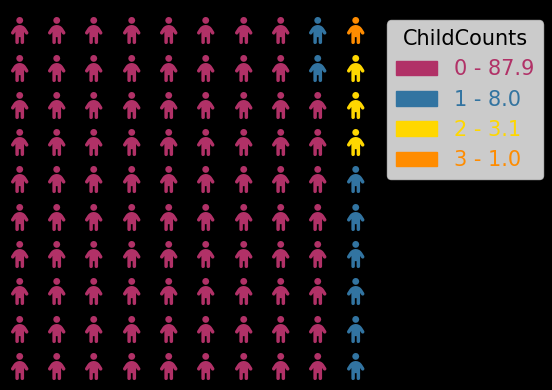

In [12]:
# ChildCounts distribution
child_counts = member_df['ChildCounts'].value_counts(normalize=True).mul(100).round(1).to_dict()
fig = plt.figure(
    FigureClass = Waffle, 
    rows = 10,
    columns = 10,
    values = child_counts,
    colors = ('#B13167', '#3274A1', '#FFD700', '#FF8C00'),
    labels = ['{} - {}'.format(a, b) for a, b in zip(child_counts.keys(), child_counts.values())],
    legend = {
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1), 
        'fontsize': 15, 
        'labelcolor': 'linecolor',
        'title': 'ChildCounts',
        'title_fontsize': 15,
        'facecolor': 'white'
        },
    font_size = 60, 
    figsize = (8, 4),
    icons='child',  # Specify the icon to use
    icon_size=20,
    facecolor='black'
)

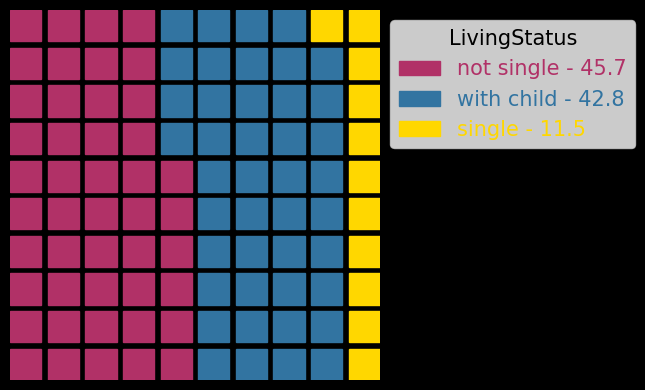

In [13]:
# LivingStatus distribution
living_status = member_df['LivingStatus'].value_counts(normalize=True).mul(100).round(1).to_dict()
fig = plt.figure(
    FigureClass = Waffle, 
    rows = 10,
    columns = 10,
    values = living_status,
    colors=('#B13167', '#3274A1', '#FFD700'),
    labels = ['{} - {}'.format(a, b) for a, b in zip(living_status.keys(), living_status.values())],
    legend = {
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1), 
        'fontsize': 15, 
        'labelcolor': 'linecolor',
        'title': 'LivingStatus',
        'title_fontsize': 15,
        'facecolor': 'white'
        },
    font_size = 60, 
    figsize = (8, 4),
    icon_size=20,
    facecolor='black'
)

In [14]:
def replace_county_name(cell: Tuple[str, str]) -> str:
    # 台北市沒有南屯區，然後鼓山區在高雄...
    county_name, city_name = cell
    res = county_name
    if city_name == '南屯區':
        res = '台中市'
    if city_name == '鼓山區':
        res = '高雄市'
    return res

# 有一筆 'New Taipei City'在CountyName裏面
member_df.loc[:, 'CountyName'] = member_df['CountyName'] \
                                    .str.replace('New Taipei City', '新北市')
# 龍潭是鄉不是區
member_df.loc[:, 'CityName'] = member_df['CityName'] \
                                    .str.replace('龍潭鄉', '龍潭區')
member_df.loc[:, 'CountyName'] = member_df[['CountyName', 'CityName']] \
                                    .apply(replace_county_name, axis=1)
member_df.loc[:, 'Address'] = member_df['CountyName'] + member_df['CityName']
address_count = member_df['Address'].value_counts().rename_axis('Address').reset_index(name='Counts')
geolocation = pd.read_csv(GEOLOCATION_PATH)
address_count = address_count.merge(geolocation, on='Address', how='left')
address_count = address_count[['Address', 'Counts', 'Lat', 'Lot']]

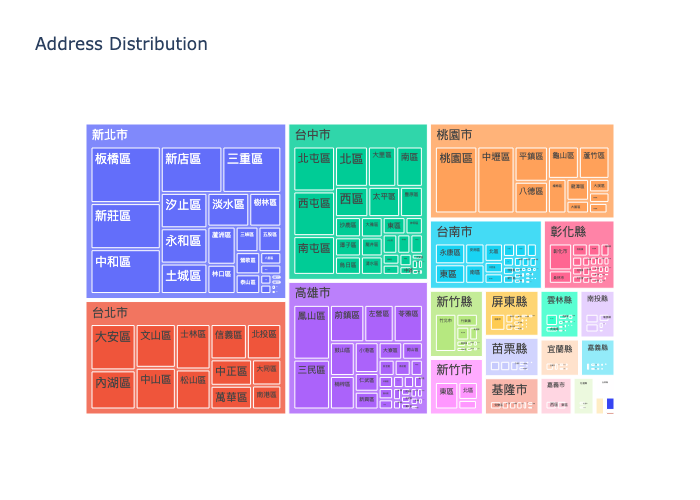

In [15]:
# Address distribution
address = member_df.groupby(['CountyName', 'CityName']).size().reset_index(name='Counts')
fig = px.treemap(address, path=['CountyName', 'CityName'], values='Counts', title='Address Distribution')
fig.show()

```python
# wtf ploty scatter map跑不出來
fig = px.scatter_mapbox(
    address_count, 
    lat='Lat',  # Ensure this column exists and has valid latitude data
    lon='Lot',  # Corrected from 'Lot' to 'Lon', ensure this column exists and has valid longitude data
    size='Counts',  # Ensure this column exists and has numeric data
    hover_name='Address',  # Ensure this column exists
    title='Member Distribution by Address',
    color_continuous_scale=px.colors.cyclical.IceFire,  # This is for continuous data; ensure 'Counts' is appropriate for this
    size_max=25, 
    color_discrete_sequence=["fuchsia"], mapbox_style="carto-positron"
)
fig.update_layout(mapbox_style="open-street-map")

fig.show()
```

### 2. Master Data (Ticket)

In [16]:
master_df.head()

,MemberID,TicketID,PurchaseStore,TicketSales,OrderDate
0,085bf9587c8243857e41c092f693f89b9de706464d4292...,Ticket_b872eab,Store_18ccc3e,894,2023-02-10
1,0f6231010dd6504ae8afdb127d3c03bd1babe68c57b4ce...,Ticket_375a450,Store_18ccc3e,60,2022-12-30
2,0f6231010dd6504ae8afdb127d3c03bd1babe68c57b4ce...,Ticket_f580d74,Store_18ccc3e,648,2023-01-22
3,11eed77d03a31a6d3380a2988bd54e8e307265aee0b59f...,Ticket_7def892,Store_18ccc3e,399,2023-06-17
4,1987e81f3d9ed7bb537ac0517a7d96d32ee6b91334ccac...,Ticket_464df4f,Store_18ccc3e,399,2023-11-13


In [17]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48685 entries, 0 to 48684
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MemberID       48685 non-null  object
 1   TicketID       48685 non-null  object
 2   PurchaseStore  48685 non-null  object
 3   TicketSales    48685 non-null  int64 
 4   OrderDate      48685 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


#### 2.1 Master Data Preprocessing

In [18]:
master_df.loc[:, 'OrderDate'] = pd.to_datetime(master_df['OrderDate'], format='%Y-%m-%d')

In [19]:
# 有小於0的交易金額，可能是退貨 or 贈品，先排除掉這些資料
#TODO 可以看誰是奧客 or 常被退的產品
master_df = master_df[master_df['TicketSales'] > 0]

#### 2.2 Master Data Visualization

/Users/paulchang/opt/miniconda3/envs/twds/lib/python3.11/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



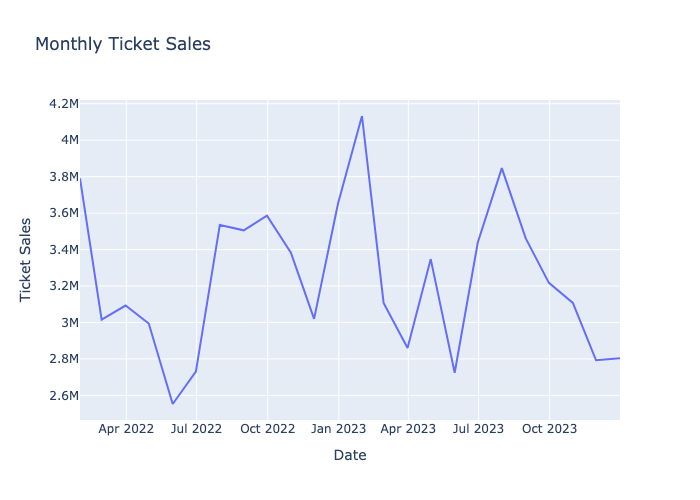

In [20]:
# 每月銷售額 (TicketSales)
monthly_sale = master_df.resample('ME', on='OrderDate').agg({'TicketSales': 'sum'}).reset_index()
fig = px.line(monthly_sale, x='OrderDate', y='TicketSales', title='Monthly Ticket Sales')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Ticket Sales')
fig.show()

/Users/paulchang/opt/miniconda3/envs/twds/lib/python3.11/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



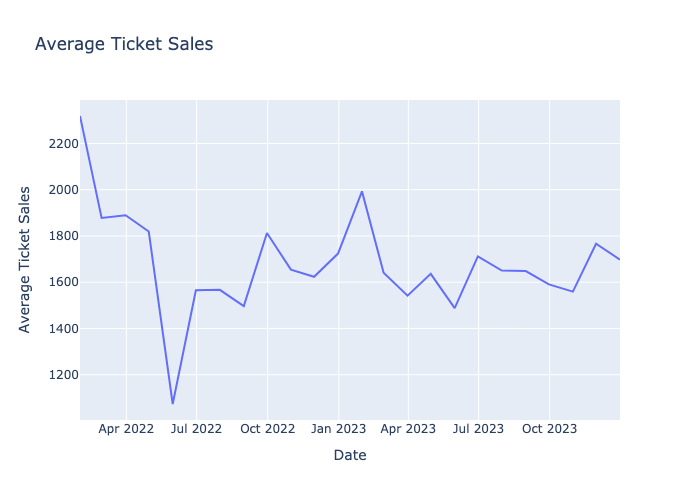

In [21]:
# Monthly Purchase value (Total TicketSales / Total Orders)
avg_ticket = master_df.resample('ME', on='OrderDate').agg({'TicketSales': 'mean'}).reset_index()
fig = px.line(avg_ticket, x='OrderDate', y='TicketSales', title='Average Ticket Sales')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Average Ticket Sales')
fig.show()

/Users/paulchang/opt/miniconda3/envs/twds/lib/python3.11/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



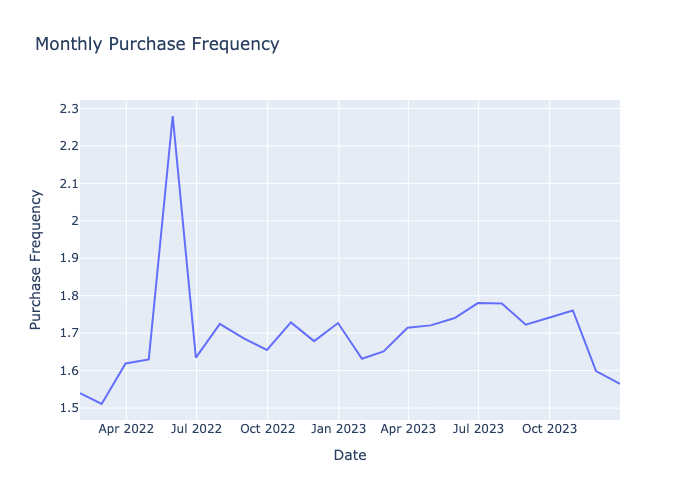

In [22]:
# Monthly purchase frequency (Total Tickets / No. of unique Members)
monthly_purchase = master_df.resample('ME', on='OrderDate').agg({'TicketID': 'count', 'MemberID': 'nunique'}).reset_index()
monthly_purchase.loc[:, 'PurchaseFrequency'] = monthly_purchase['TicketID'] / monthly_purchase['MemberID']
fig = px.line(monthly_purchase, x='OrderDate', y='PurchaseFrequency', title='Monthly Purchase Frequency')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Purchase Frequency')
fig.show()

/Users/paulchang/opt/miniconda3/envs/twds/lib/python3.11/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.

/Users/paulchang/opt/miniconda3/envs/twds/lib/python3.11/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning:

Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.



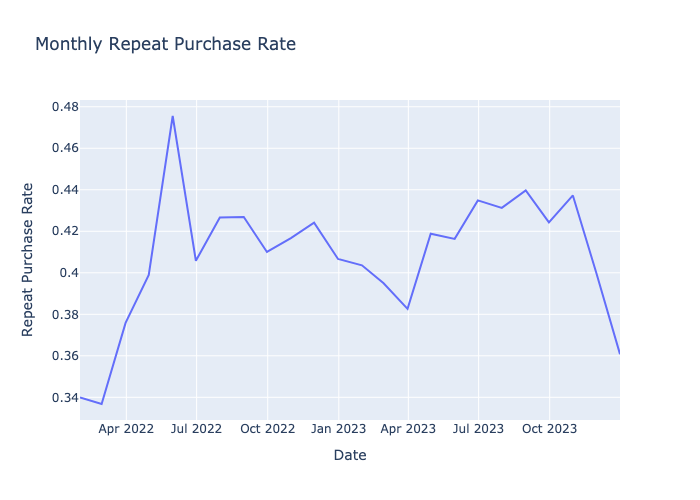

In [23]:
# Monthly Repeat Purchase Rate (No. of repeat customers / No. of unique customers)
monthly_customer_purchases = master_df.groupby([pd.Grouper(key='OrderDate', freq='ME'), 'MemberID']).size().reset_index(name='PurchaseCount')
monthly_repeat_customers = monthly_customer_purchases[monthly_customer_purchases['PurchaseCount'] > 1].groupby('OrderDate').size()
monthly_unique_customers = master_df.groupby(pd.Grouper(key='OrderDate', freq='ME'))['MemberID'].nunique()
monthly_repeat_purchase_rate = (monthly_repeat_customers / monthly_unique_customers).fillna(0).reset_index(name='RepeatPurchaseRate')
fig = px.line(monthly_repeat_purchase_rate, x='OrderDate', y='RepeatPurchaseRate', title='Monthly Repeat Purchase Rate')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Repeat Purchase Rate')
fig.show()

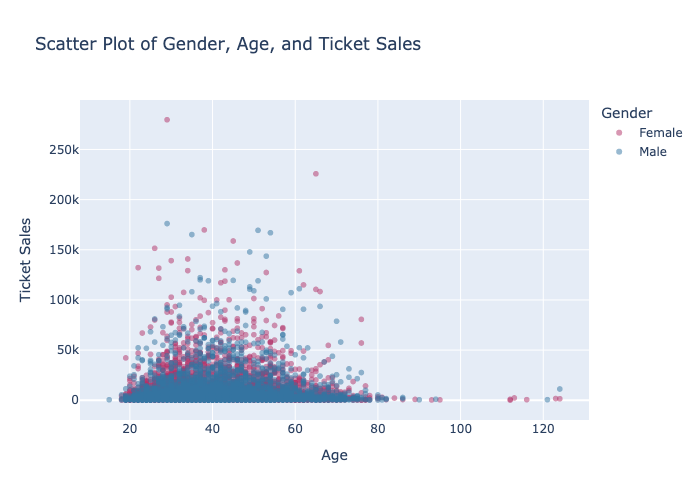

In [24]:
# Scatter of gender / age /ticket sales, 顏色重疊太多，看起來沒感覺
ticket_sales = master_df.groupby('MemberID')['TicketSales'].sum().reset_index()
member_ticket_sales = member_df.merge(ticket_sales, on='MemberID', how='inner')
color_discrete_map = {'Male': 'rgba(50, 116, 161, 0.5)', 'Female': 'rgba(177, 49, 103, 0.5)'}
fig = px.scatter(
    member_ticket_sales, 
    x='Age', 
    y='TicketSales', 
    color='Gender', 
    title='Scatter Plot of Gender, Age, and Ticket Sales',
    labels={'Age': 'Age', 'TicketSales': 'Ticket Sales', 'Gender': 'Gender'},
    color_discrete_map=color_discrete_map
)

fig.show()

### 3. Detail data

In [25]:
detail_df.head()

,MemberID,TicketID,ProductID,ProductCategory,Sales,Quantity
0,4e852ef10719b62af41abc447b3a9868cb2806d115dd27...,Ticket_58175a7,Product_00d4300,ProductCate_f3cb901,0,1.0
1,8205f7a2adef38908638172193ca948f94902a2eefdfd1...,Ticket_5c066ad,Product_00d4300,ProductCate_f3cb901,0,1.0
2,fb3d15b2d3f295220368cb24a9fe5d7720aea0a2ef1c92...,Ticket_7f63a88,Product_00d4300,ProductCate_f3cb901,0,1.0
3,5ceba77ef8d8f1a1bb25817455cf28818c079a757e354e...,Ticket_e0807f4,Product_00d4300,ProductCate_f3cb901,0,1.0
4,0796d4690cb64240610564c016def24960090170c21097...,Ticket_b92686f,Product_00d4300,ProductCate_f3cb901,0,1.0


In [26]:
detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242607 entries, 0 to 242606
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MemberID         242607 non-null  object 
 1   TicketID         242607 non-null  object 
 2   ProductID        242607 non-null  object 
 3   ProductCategory  206299 non-null  object 
 4   Sales            242607 non-null  int64  
 5   Quantity         242607 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 11.1+ MB


#### 3.1 Datail Data Preprocessing

In [27]:
# Calculate ProductPrice, zero or negative value should be removed
detail_df['ProductPrice'] = detail_df['Sales'] / detail_df['Quantity']
detail_df = detail_df[detail_df['ProductPrice'] > 0]

#### 3.2 Datail Data Visualization

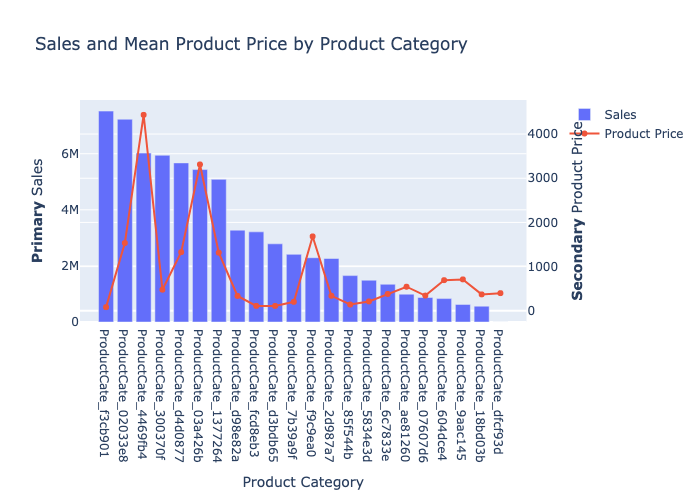

In [28]:
# Sales and Mean Product Price by Product Category
product_cate_df = detail_df.groupby('ProductCategory') \
         .agg({'Sales': 'sum', 'ProductPrice': 'mean'}) \
         .reset_index() \
         .sort_values('Sales', ascending=False)

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(x=product_cate_df['ProductCategory'], y=product_cate_df['Sales'], name='Sales'),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter(x=product_cate_df['ProductCategory'], y=product_cate_df['ProductPrice'], name='Product Price', mode='lines+markers'),
    secondary_y=True,
)
fig.update_layout(
    title_text="Sales and Mean Product Price by Product Category"
)
fig.update_xaxes(title_text="Product Category")
fig.update_yaxes(title_text="<b>Primary</b> Sales", secondary_y=False)
fig.update_yaxes(title_text="<b>Secondary</b> Product Price", secondary_y=True)
fig.show()

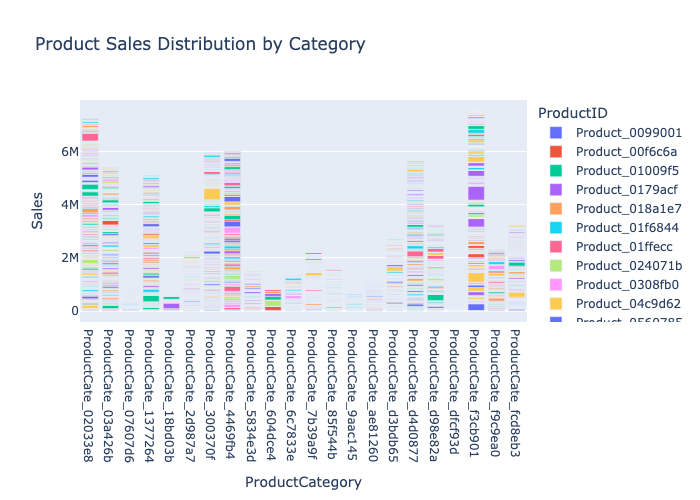

In [29]:

# Product Sales Distribution by Category
detail = detail_df.groupby(['ProductCategory', 'ProductID']).agg({'Sales': 'sum'}).reset_index()
detail['Sales'] = pd.to_numeric(detail['Sales'])
fig = px.bar(detail, x='ProductCategory', y='Sales', color='ProductID', title='Product Sales Distribution by Category')
fig.show()

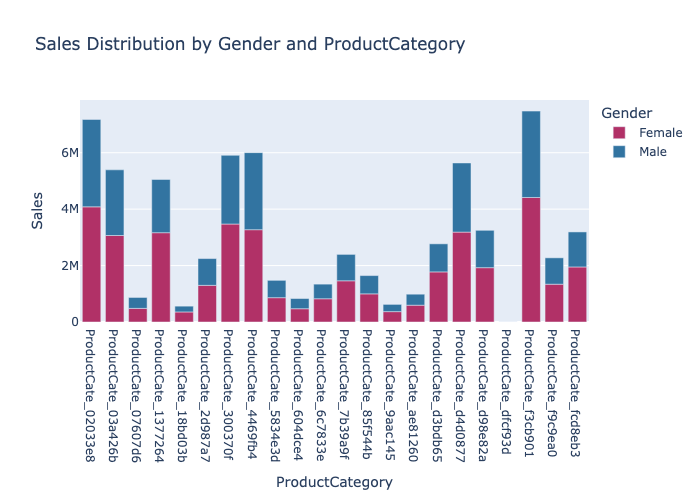

In [30]:
# Product Sales Distribution by Gender and ProductCategory
gender_product_cate = pd.merge(member_df, detail_df, on='MemberID', how='inner')
sales_by_gender_cate = gender_product_cate.groupby(['Gender', 'ProductCategory']).agg({'Sales': 'sum'}).reset_index()

color_map = {'Male': '#3274A1', 'Female':'#B13167'}
fig_male = px.bar(sales_by_gender_cate, x='ProductCategory', y='Sales', color='Gender', title='Sales Distribution by Gender and ProductCategory', color_discrete_map=color_map)
fig_male.show()

In [31]:
# Analysis of Discounted Products for Price-Sensitive Customer Identification

# Aggregate data by 'ProductID' to compute statistics for price variations
discount_stats_df = detail_df.groupby('ProductID').agg(
    ProductCategory=pd.NamedAgg(column='ProductCategory', aggfunc='first'),
    AveragePrice=pd.NamedAgg(column='ProductPrice', aggfunc='mean'),
    MinPrice=pd.NamedAgg(column='ProductPrice', aggfunc='min'),
    MaxPrice=pd.NamedAgg(column='ProductPrice', aggfunc='max'),
    MostFrequncyPrice=pd.NamedAgg(column='ProductPrice', aggfunc=lambda x: x.mode().iloc[0]),
    PriceCount=pd.NamedAgg(column='ProductPrice', aggfunc='count'),
    PriceChangeCount=pd.NamedAgg(column='ProductPrice', aggfunc=lambda x: x.nunique()),
    PriceChangeRatio=pd.NamedAgg(column='ProductPrice', aggfunc=lambda x: x.nunique() / x.count())
).reset_index()
# Ensure numerical columns have two decimal places for consistency and readability
float_columns = ['AveragePrice', 'MinPrice', 'MaxPrice', 'MostFrequncyPrice']
discount_stats_df[float_columns] = discount_stats_df[float_columns].round(2)

# Calculate the discount ratio to understand the extent of price variation
discount_stats_df['DiscountRatio'] = (discount_stats_df['MaxPrice'] - discount_stats_df['MinPrice']) / discount_stats_df['MaxPrice']

# Identify products with price changes, indicating potential discounts, and sort by frequency of price changes
discounted_products_df = discount_stats_df[discount_stats_df['PriceChangeCount'] > 1] \
                        .sort_values('PriceChangeCount', ascending=False)
discounted_products_df.head(10)

,ProductID,ProductCategory,AveragePrice,MinPrice,MaxPrice,MostFrequncyPrice,PriceCount,PriceChangeCount,PriceChangeRatio,DiscountRatio
8959,Product_e56b75e,ProductCate_18bd03b,802.31,8.00,5657.00,400.00,149,99,0.664430,0.998586
1173,Product_1f5468e,ProductCate_604dce4,974.39,400.00,7123.00,400.00,172,97,0.563953,0.943844
5282,Product_87b6beb,ProductCate_604dce4,871.27,400.00,3962.00,400.00,103,64,0.621359,0.899041
7143,Product_b7045bd,ProductCate_f3cb901,640.38,330.83,666.67,666.67,89,57,0.640449,0.503757
5780,Product_94a0567,ProductCate_604dce4,1215.31,400.00,4425.00,400.00,71,51,0.718310,0.909605
5852,Product_9669b2e,ProductCate_f3cb901,49.07,32.00,50.00,50.00,7073,40,0.005655,0.360000
29,Product_00d4300,ProductCate_f3cb901,25.42,9.00,30.00,25.00,8031,32,0.003985,0.700000
4827,Product_7bd89e6,ProductCate_fcd8eb3,58.38,0.43,59.00,59.00,1279,27,0.021110,0.992712
3268,Product_53dd3e7,ProductCate_604dce4,828.25,150.00,1365.00,990.00,305,22,0.072131,0.890110
7311,Product_bb59122,ProductCate_f3cb901,63.48,42.00,69.00,65.00,1373,21,0.015295,0.391304


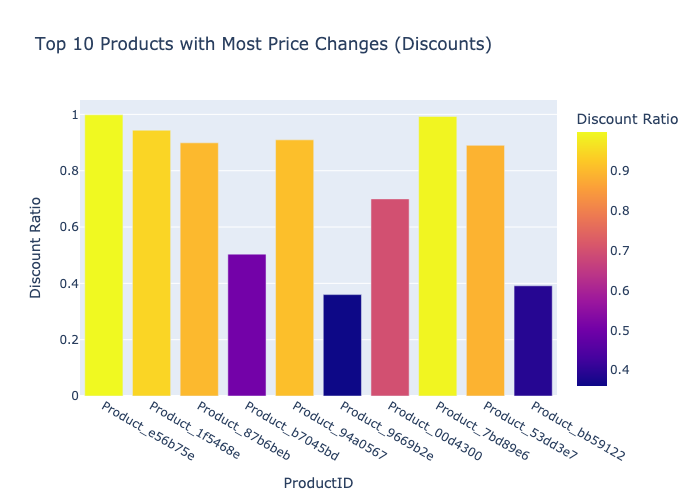

In [32]:
# Visualie the top 10 products with the most price changes (discounts)
top_n = 10
top_discounted_products_df = discounted_products_df.head(top_n)
fig = px.bar(top_discounted_products_df, x='ProductID', y='DiscountRatio',
             hover_data=['ProductCategory', 'AveragePrice', 'MinPrice', 'MaxPrice'],
             color='DiscountRatio',
             labels={'DiscountRatio': 'Discount Ratio'},
             title='Top 10 Products with Most Price Changes (Discounts)')
fig.show()

In [33]:
# Calculate Discount Statistics by Product Category
product_category_discount_stats = discount_stats_df.groupby('ProductCategory').agg(
    AverageDiscountRatio=pd.NamedAgg(column='DiscountRatio', aggfunc='mean'),
    MaxDiscountRatio=pd.NamedAgg(column='DiscountRatio', aggfunc='max'),
    MinDiscountRatio=pd.NamedAgg(column='DiscountRatio', aggfunc='min'),
    DiscountedProductsCount=pd.NamedAgg(column='ProductID', aggfunc='count')
).reset_index()
product_category_discount_stats = product_category_discount_stats.round(2)
product_category_discount_stats

,ProductCategory,AverageDiscountRatio,MaxDiscountRatio,MinDiscountRatio,DiscountedProductsCount
0,ProductCate_02033e8,0.19,1.00,0.0,484
1,ProductCate_03a426b,0.10,0.98,0.0,413
2,ProductCate_07607d6,0.16,0.91,0.0,278
3,ProductCate_1377264,0.16,1.00,0.0,281
4,ProductCate_18bd03b,0.12,1.00,0.0,43
5,ProductCate_2d987a7,0.23,0.99,0.0,551
6,ProductCate_300370f,0.23,0.99,0.0,674
7,ProductCate_4469fb4,0.16,0.90,0.0,175
8,ProductCate_5834e3d,0.19,0.98,0.0,209
9,ProductCate_604dce4,0.41,0.96,0.0,25


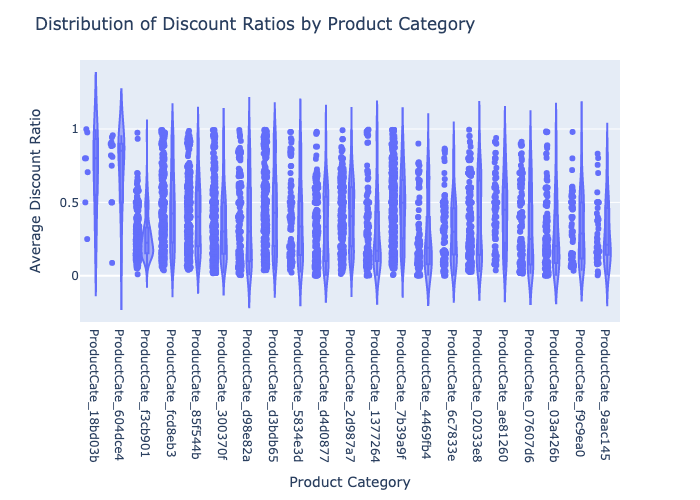

In [34]:
# Visualize Distribution of Discount Ratios by Product Category
fig = px.violin(discounted_products_df, y='DiscountRatio', x='ProductCategory', box=True, points="all",
                hover_data=discounted_products_df.columns)

fig.update_layout(
    title_text='Distribution of Discount Ratios by Product Category',
    yaxis_title='Average Discount Ratio',
    xaxis_title='Product Category'
)

fig.show()